# Curso de Big Data. Otoño 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo 24 de marzo a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: v.oubina@gmail.com
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

In [2]:
#En primer lugar, nos aseguramos de instalar el paquete requests y pandas para luego importarlo a nuestro código
#%pip install requests 
#%pip install pandas
#%pip install matplotlib
import requests 
import pandas as pd
import matplotlib.pyplot as plt

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [3]:
#Obtenemos los datos, junto a su matriz json para obtener el listado de mercadería relacionado a la búsqueda
buscar = "Whisky Johnny Walker"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))
response = requests.request("GET", url)
data = response.json()
#Iniciamos el listado de objetos en nuestros resultados de busqueda
p = 0
listado=[]
while p<len(data['results']):
    item = data['results'][p]['title']
    listado.append(item)
    p=p+1
print(listado[:5])


['Whisky Johnnie Walker Red Label X 1 Litro', 'Johnny Walker Black Label Whisky 750 Ml', 'Whisky Johnny Walker Jw Gold Label Reserve Johnnie 750ml', 'Whisky Johnnie Walker Double Black Blended Escocés 750ml', 'Johnnie Walker Black Label 1 Litro Con Estuche']


#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [21]:
#Procedemos similarmente al punto anterior para formular un catalogo que incluya el nombre de las publicaciones junto a su precio.
p = 0
Precios=[]
while p<len(data['results']):
    item = data['results'][p]['price']
    Precios.append(item)
    p=p+1
print(Precios)
#realizamos una lista llamada catalogo para unir a ella en forma de diccionario las variables pertenecientes a Precios y listado
p = 0
catalogo=[]
while p<len(data['results']):
    catalogo.append({'Item':listado[p], 'Precio':Precios[p]})

    p=p+1
#Convertimos la lista en un dataframe con pandas
catalogo_df=pd.DataFrame(catalogo)
catalogo_df.sample(5)

[30227, 48574, 151064.73, 55990, 60657, 53990, 85419.89, 22999, 103085, 54889, 72500, 35418.97, 37948, 71345, 73500, 84999, 89000, 28950, 87500, 68536, 102064, 56231, 43020, 59320.79, 299000, 29817.92, 47698, 54680.5, 115500, 127003.6, 34900, 43500, 51700, 46493, 51827.9, 51116.68, 42999, 40672, 49946, 166945, 216287.68, 54640, 104999, 78990, 62999, 59000, 93614.41, 61518.6, 65000, 99995]


,Item,Precio
22,Whisky Johnny Walker Importado Johnnie Black L...,43020.0
43,Whisky Johnnie Walker Black Label 12 Años 750 ...,78990.0
41,Johnnie Black Label Estuche Ferrero X12 Zetta ...,54640.0
7,Whisky Escocés Blended Red Label Johnnie Walke...,22999.0
3,Whisky Johnnie Walker Double Black Blended Esc...,55990.0


In [5]:
#Utilizamos las funciones de los dataframes para buscar los valores deseados, marcando que los valores deben pertenecer a la columna de Precio
media = catalogo_df['Precio'].mean()
maximo = catalogo_df['Precio'].max()
minimo = catalogo_df['Precio'].min()
print(f"La media del catalogo es {media}. Asimismo, el maximo y minimo son {maximo} y {minimo} respectivamente")

La media del catalogo es 74561.4334. Asimismo, el maximo y minimo son 299000.0 y 22999.0 respectivamente


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

Text(0.5, 1.0, 'Histograma de precios')

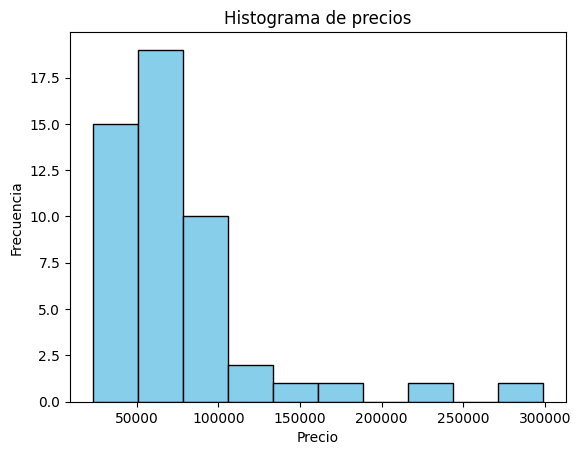

In [6]:
plt.hist(catalogo_df['Precio'], color='skyblue', edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de precios')
#Observamos un outlier notorio, el cual se puede deber a que el valor de un whisky varia en base a muchas variables, como el tipo de barrica utilizada...
#O el tiempo que se mantuvo estacionado. Esto sucede aun bajo la misma marca.

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

<h5 style="color:green">Consulta Adicional: Tiempo de respuesta</h5>
Armamos un Dataframe con el tiempo promedio en segundos que tardan en responder los vendedores a las cosultas de los usuarios

In [7]:
responses=[]

In [22]:
buscar = "Whisky Johnny Walker"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))
response = requests.request("GET", url)
data = response.json()
if len(responses)==0:               # Esto es para que no itere la respuesta cada vez que se corre el codigo (Tarda 10 segundos)
    for i in data['results']:
        id = i['id']
        url = f'https://api.mercadolibre.com/questions/search?item_id={id}'
        response = requests.request("GET", url)
        responses.append(response.json())


In [20]:
from datetime import datetime

response_time = pd.DataFrame()
out={}
unanswered={}
for item in responses:                         
    answered_question_resp_times=[]
    unanswered_questions=[]
    
    if len(item['questions'])==0:            # Si no hay preguntas pasa al proximo item, sino
        continue
    
    else:
        for q in item['questions']:          # calcula tiempo entre respuesta y pregunta (si hay respuesta).
            if q['status'] != 'ANSWERED':
                unanswered_questions.append(q['date_created'])  # Aca guarda en la lista las preguntas que no fueron resueltas
            else:

                date_format = "%Y-%m-%dT%H:%M:%S.%f%z"          # Este es el formato ISO en el la API que devuelve el momento de pregunta o respuesta 
                
                question_time = f"{q['date_created']}"
                answer_time = f"{q['answer']['date_created']}"
                
                # Convierte en objeto de datime, toma diferencias y las guarda:
                dt_question_time = datetime.strptime(question_time, date_format)    
                dt_answer_time = datetime.strptime(answer_time, date_format)
                time_difference = dt_answer_time - dt_question_time
                dif = time_difference.total_seconds()
                answered_question_resp_times.append(dif)

    # Crea un diccionario para cada item
    out[f'{item['questions'][0]['item_id']}'] = {}
    
    # Guardo la cantidad de preguntas sin responder
    out[f'{item['questions'][0]['item_id']}']['unanswered'] = len(unanswered_questions) if len(unanswered_questions) != 0 else 0

    # Guarda el promedio de tiempo que tarda en responder
    out[f'{item['questions'][0]['item_id']}']['avg_answer_time'] = sum([i for i in answered_question_resp_times])/len(answered_question_resp_times) if len(item['questions'])!=0 else 'none'

df = pd.DataFrame(out).transpose()
df.nsmallest(5, 'avg_answer_time')

,unanswered,avg_answer_time
MLA1264093101,0.0,14.9120
MLA1400922481,0.0,40.0490
MLA1412534353,0.0,103.0540
MLA1260052150,0.0,145.6450
MLA790496682,0.0,161.5624


La idea sería que el producto cuyo vendedor tarda menos en responder es un vendedor mas comprometido/confiable

### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [17]:
import requests 
from bs4 import BeautifulSoup 
import pandas as pd 
url = "https://www.lanacion.com.ar/" #Definimos la URL principal
LN_html = requests.get(url) #traigo el contenido del html
contenido =LN_html.content

In [19]:
soup = BeautifulSoup(contenido, "html.parser")

links_elements = soup.find('a', class_='link ln-link flex flex-column --unstyled') #Buscamos los tags 'a' dentro de la sopa e indicamos la clase.

#Extraemos los links que tienen el tag href
primer_link = links_elements.get('href')

print('primer link:', primer_link)  #Printeamos el primer link.

primer link: /politica/posse-extiende-su-influencia-a-la-afi-y-advierten-sobre-el-regreso-de-viejas-practicas-en-el-area-de-nid23032024/


Arriba solo obtuvimos el primer elemento con el tag 'a'. Usando la función soup.select armamos una lista con todos los elementos que empiezan de esa manera. Usamos soup.select en vez de find_all porque nos permite usar solo los tags 'a' que estan dentro de tags 'article', es decir agarramos unicamente los links de los articulos y no los de todos los tags 'a' con links en la pagina. Además creamos una lista vacía para completar con los enlaces correspondientes

In [20]:
total_links = soup.select('article>a') 

links = []

for link in total_links:
    a_text = link.get('href')
    links.append({
        'Enlace': a_text
    })

links_df = pd.DataFrame(links)
links_df

,Enlace
0,/politica/posse-extiende-su-influencia-a-la-af...
1,/politica/jubilaciones-subsidios-obra-publica-...
2,/seguridad/los-videos-claves-que-incriminan-a-...
3,/el-mundo/el-espeluznante-video-en-primera-per...
4,/politica/marcha-por-el-24-de-marzo-la-izquier...
...,...
115,/revista-lugares/el-guardian-de-las-sierras-bo...
116,/sociedad/cual-es-el-valor-actualizado-de-las-...
117,/economia/cuanto-saldran-los-boletos-de-colect...
118,/feriados/2024/que-dias-de-semana-santa-2024-n...


Como podemos ver, es simplemente una serie con el indice de la file y el link. Ahora debemos unir los enlaces extraídos con la raiz si no estaba en el tag.

In [21]:
for index, row in links_df.iterrows():
    i = row['Enlace']
    if not i.startswith(url):
        links_df.at[index, 'Enlace'] = url + i

Exportamos a excel

In [22]:
# ruta_excel = 'C:\rena\FACULTAD\MATERIAS\IV\I\BIG DATA\Tutoriales\TP 1\DF.xlsx'
ruta_excel = "/Users/federicolopez/Library/CloudStorage/OneDrive-Personal/Documents/UDESA/07/BIGDATA/TUTORIALES/E337-BD-TPS-G1/TP1/links.xlsx"
links_df.to_excel(ruta_excel, index=False)
print("DataFrame de links exportado a Excel.")

DataFrame de links exportado a Excel.


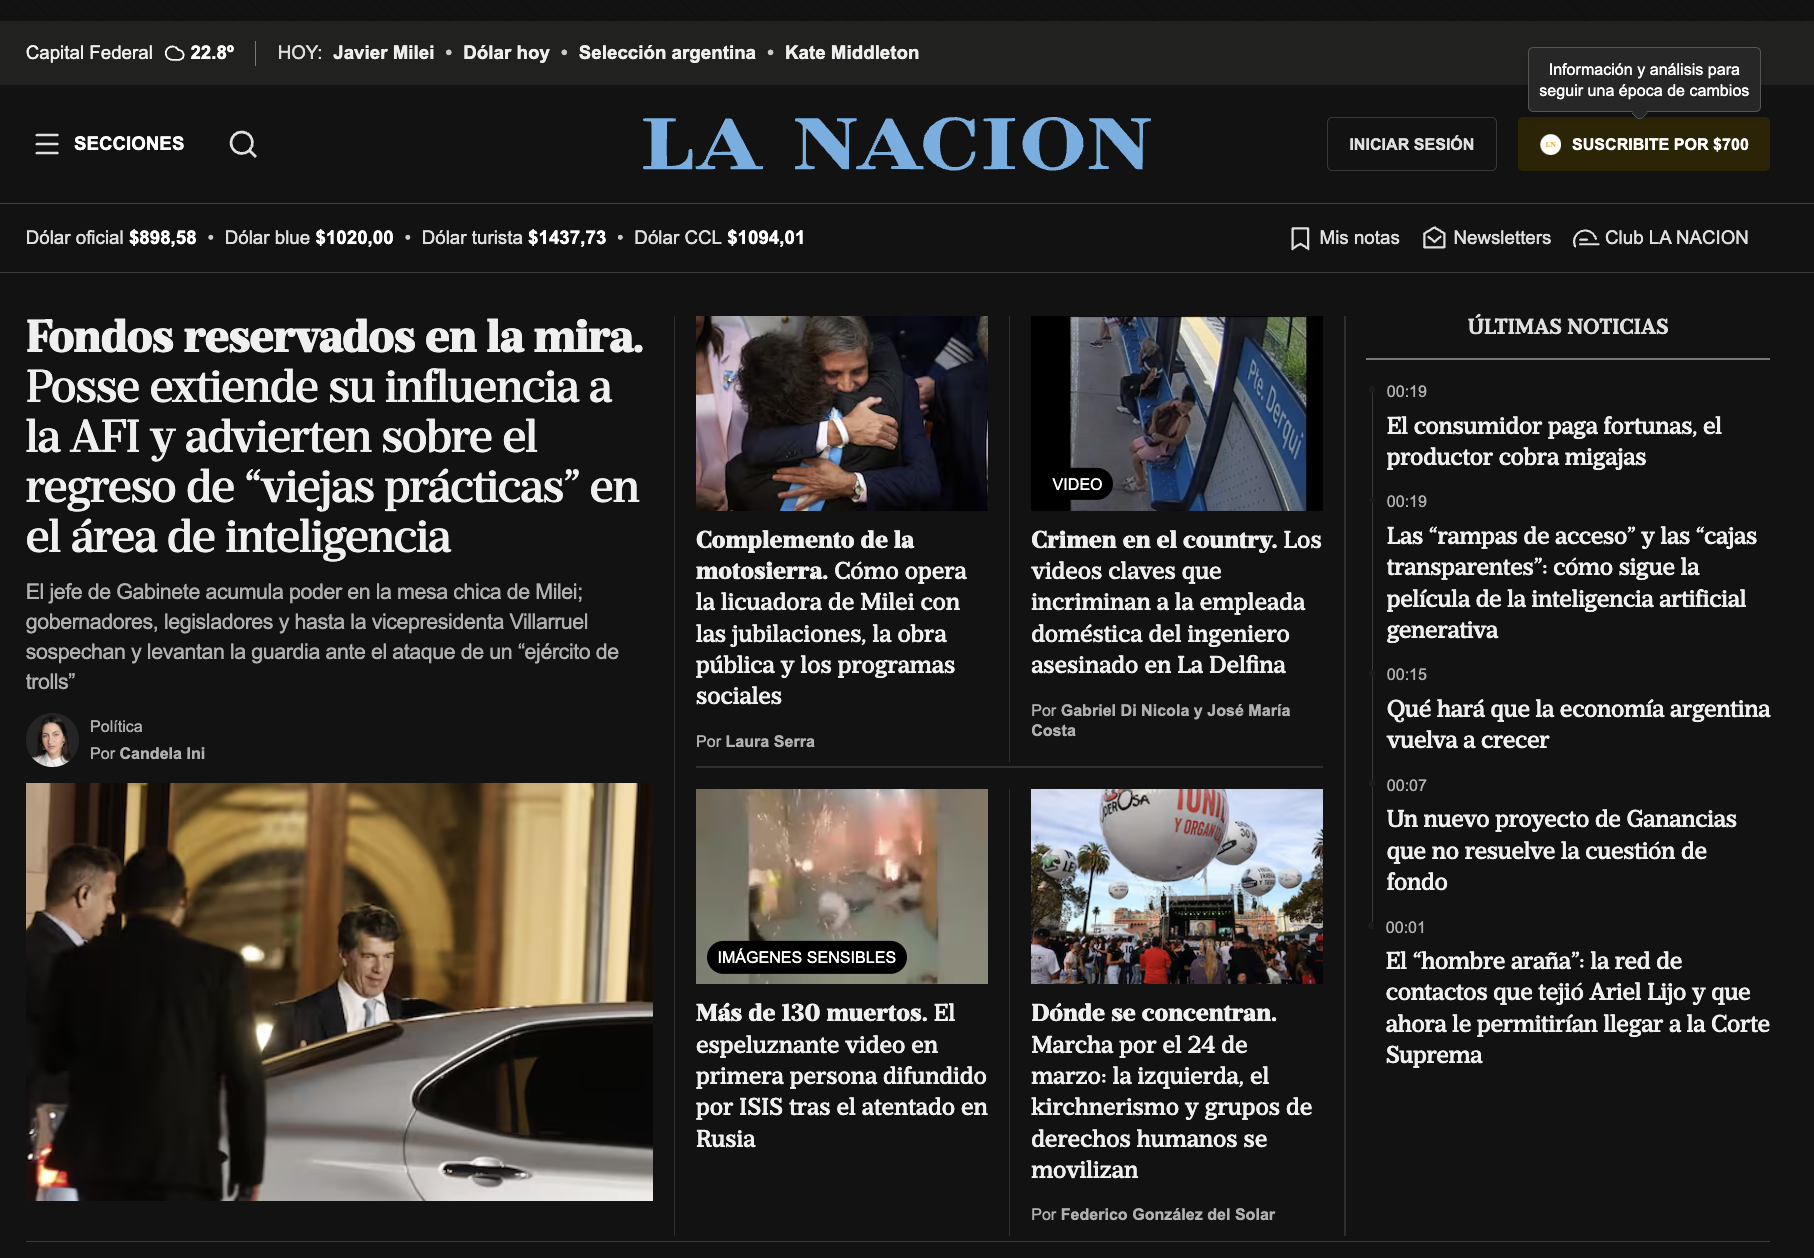